In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.13.0'

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
dataset = pd.read_csv('Dane_lab6_2.csv')

In [8]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [10]:
dataset.shape

(10000, 14)

In [11]:
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [12]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [13]:
print(y)

[1 0 1 ... 1 1 0]


In [14]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [15]:
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])

In [16]:
print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [17]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [18]:
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [19]:
x[:, 0:4]

array([[1.0, 0.0, 0.0, 619],
       [0.0, 0.0, 1.0, 608],
       [1.0, 0.0, 0.0, 502],
       ...,
       [1.0, 0.0, 0.0, 709],
       [0.0, 1.0, 0.0, 772],
       [1.0, 0.0, 0.0, 792]], dtype=object)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [21]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
ann = tf.keras.models.Sequential()

In [23]:
ann.add(
    tf.keras.layers.Dense(
        units=6,
        activation='relu'
    )
)

In [24]:
ann.add(
    tf.keras.layers.Dense(
        units=6,
        activation='relu'
    )
)

In [25]:
ann.add(
    tf.keras.layers.Dense(
        units=1,
        activation='sigmoid'
    )
)

In [26]:
ann.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [27]:
results = ann.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.5827 - accuracy: 0.7215
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4598 - accuracy: 0.8037
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4329 - accuracy: 0.8090
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4174 - accuracy: 0.8166
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4047 - accuracy: 0.8257
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3914 - accuracy: 0.8355
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8419
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3707 - accuracy: 0.8479
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3631 - accuracy: 0.8506
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3576 - accura

In [28]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 6)                   78        
                                                                 
 dense_1 (Dense)             (32, 6)                   42        
                                                                 
 dense_2 (Dense)             (32, 1)                   7         
                                                                 
Total params: 127 (508.00 Byte)
Trainable params: 127 (508.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
results.history['accuracy']

[0.7214999794960022,
 0.8037499785423279,
 0.8090000152587891,
 0.8166249990463257,
 0.8257499933242798,
 0.8355000019073486,
 0.8418750166893005,
 0.8478749990463257,
 0.8506249785423279,
 0.8528749942779541,
 0.8565000295639038,
 0.8566250205039978,
 0.8583750128746033,
 0.8575000166893005,
 0.859375,
 0.859624981880188,
 0.859250009059906,
 0.859624981880188,
 0.8618749976158142,
 0.8616250157356262,
 0.8604999780654907,
 0.8608750104904175,
 0.8615000247955322,
 0.8627499938011169,
 0.8604999780654907,
 0.8617500066757202,
 0.8616250157356262,
 0.8608750104904175,
 0.8627499938011169,
 0.8621249794960022,
 0.8610000014305115,
 0.8613749742507935,
 0.8628749847412109,
 0.8628749847412109,
 0.8646249771118164,
 0.8622499704360962,
 0.8628749847412109,
 0.8632500171661377,
 0.8636249899864197,
 0.8642500042915344,
 0.8651250004768372,
 0.8632500171661377,
 0.8629999756813049,
 0.8641250133514404,
 0.8647500276565552,
 0.8629999756813049,
 0.8642500042915344,
 0.8636249899864197,
 0.86

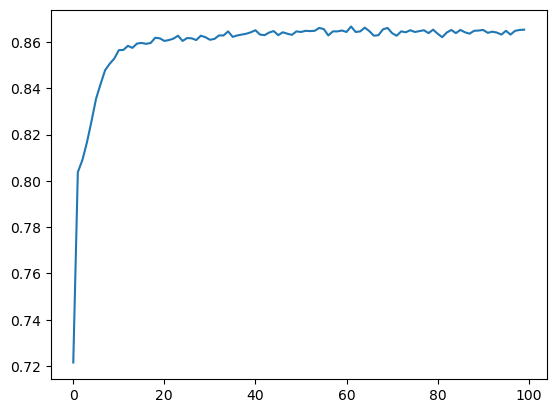

In [30]:
plt.plot(results.history['accuracy'])

In [31]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 191ms/step
[[False]]


In [32]:
ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]) > 0.5)

1/1 [==============================] - 0s 74ms/step


array([[0.0309696]], dtype=float32)

In [33]:
ann.predict(sc.transform([[0, 1, 0, 376, 0, 29, 4, 115046, 4, 1, 0, 119346]]) > 0.5)

1/1 [==============================] - 0s 35ms/step


array([[0.11369405]], dtype=float32)

In [34]:
print(ann.predict(sc.transform([[0, 1, 0, 376, 0, 29, 4, 115046, 4, 1, 0, 119346]])) > 0.5)

1/1 [==============================] - 0s 30ms/step
[[ True]]


In [35]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [36]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1520   75]
 [ 194  211]]


0.8655